# Assignment 10

### The Dataset - Intro and Manipulation

In [5]:
a10 = read.csv("~/Fall Semester 2018/Statistical Analysis with R/Assignments/Assignment 10/adult.csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(a10)
##  [1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11"
## [12] "V12" "V13" "V14" "V15"
names(a10) = c("Age", "Working Class", "Final Weight", "Education", "Ed", "Marital Status", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(a10)) 
    {
    a10[a10 ==" ?"]= NA  
    missval <- sum(is.na(a10[i]))
    if(missval > 0)
      {
      if(is.numeric(a10[[i]]) == TRUE) 
        {
         a10[[i]][is.na(a10[[i]])] <- mean(a10[[i]], na.rm = TRUE)
        }
        else 
        {
        levels=unique(a10[,i])
        a10[,i][is.na(a10[,i])]=levels[which.max(tabulate(match(a10[,i], x = levels)))]
      }
    }
}

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15"

### Data Visualization

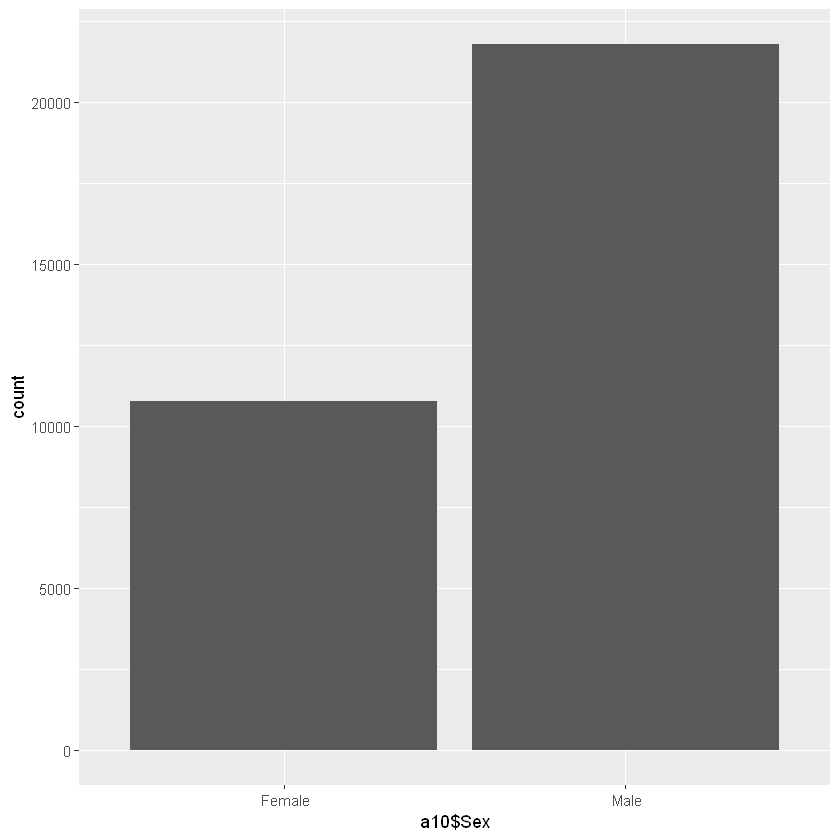

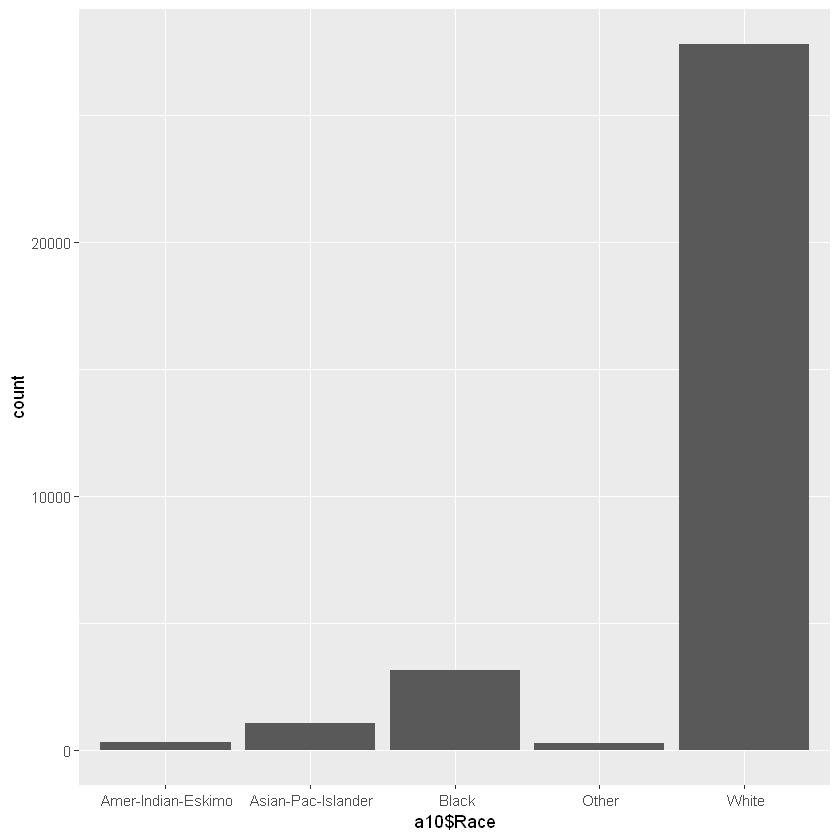

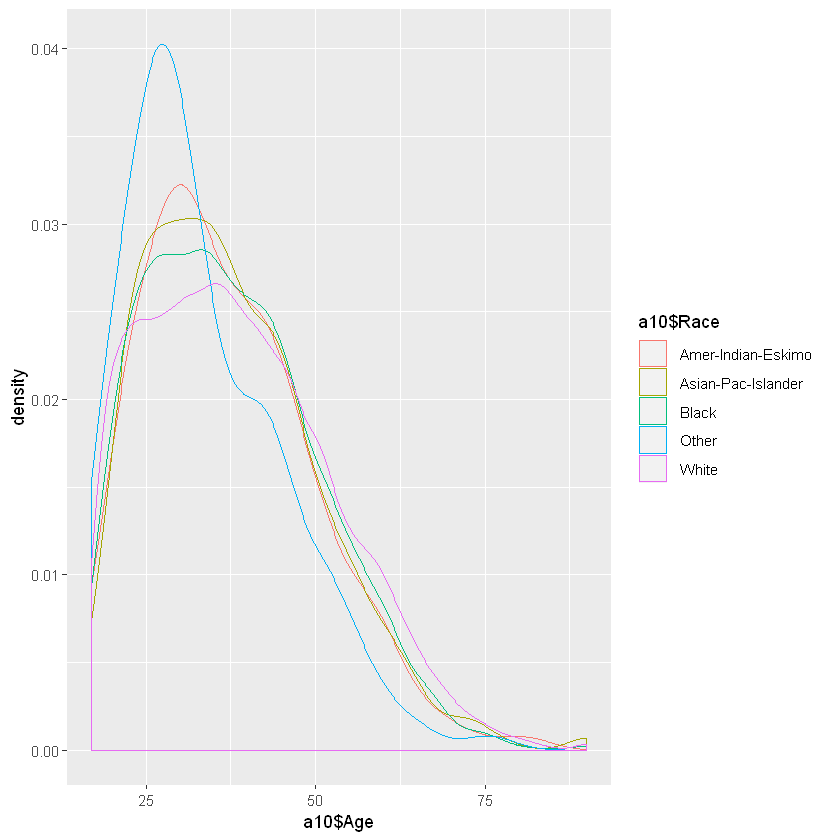

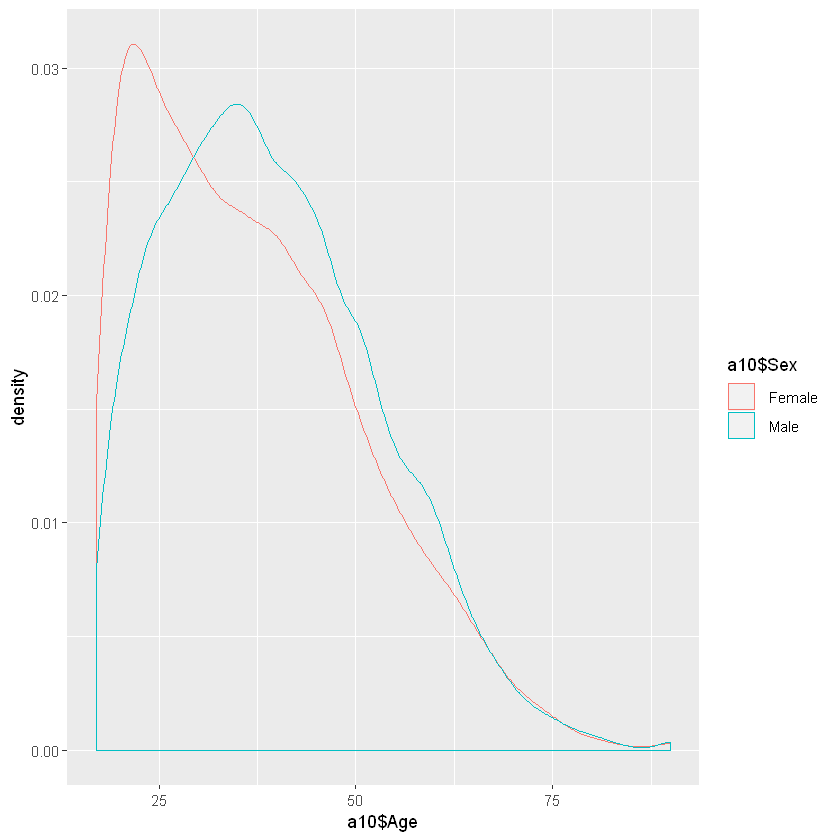

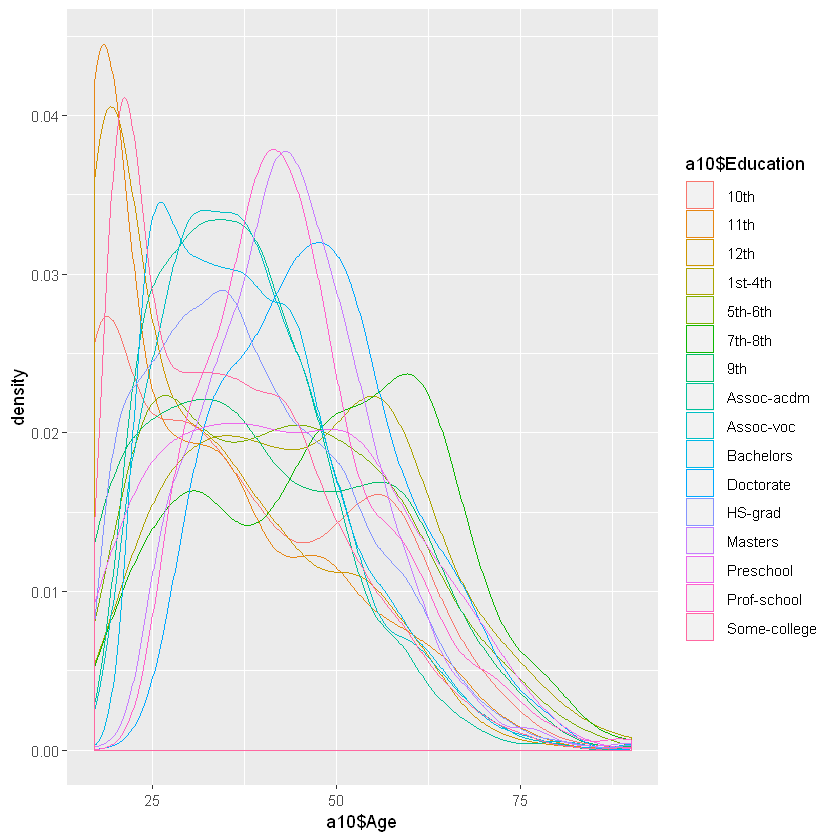

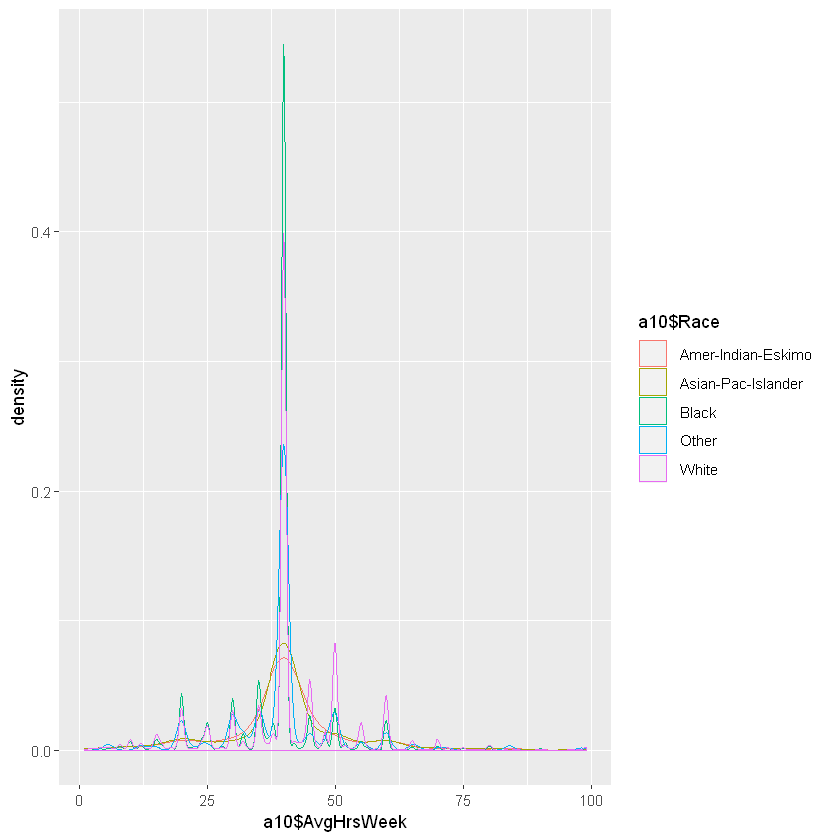

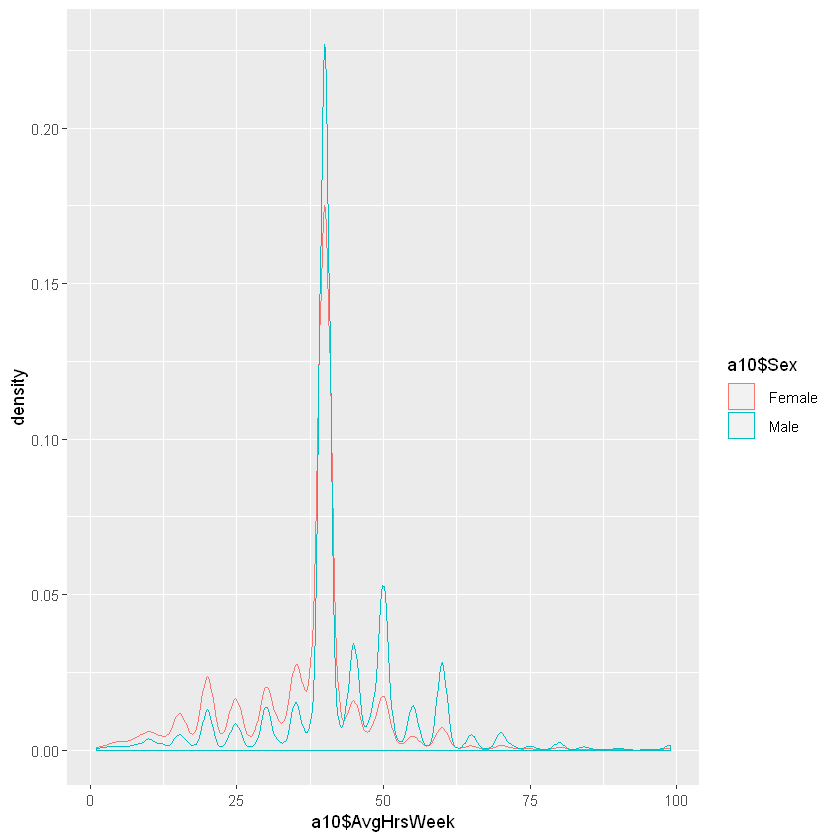

In [8]:
library(ggplot2)
ggplot(data = a10) + geom_bar(mapping = aes(x = a10$Sex))
ggplot(data = a10) + geom_bar(mapping = aes(x= a10$Race))
ggplot(data = a10) + geom_density(mapping = aes(x = a10$Age, color = a10$Race)) 
ggplot(data = a10) + geom_density(mapping = aes(x = a10$Age, color = a10$Sex)) 
ggplot(data = a10) + geom_density(mapping = aes(x = a10$Age, color = a10$Education)) 
ggplot(data = a10) + geom_density(mapping = aes(x = a10$AvgHrsWeek, color = a10$Race)) 
ggplot(data = a10) + geom_density(mapping = aes(x = a10$AvgHrsWeek, color = a10$Sex)) 

### Data Partition

In [11]:
library(ranger)
library(caret)
names(a10)[15] = "target"
splitIndex <- createDataPartition(a10$target, p = .60, list = FALSE, times = 1)
train1 <- a10[ splitIndex,]
test <- a10[-splitIndex,]

Loading required package: lattice


### Decision Tree

In [14]:
#mytree <- rpart(target ~ ., data = train, method = "class")
#pred <- predict(mytree, test, type = "class")
#fancyRpartPlot(mytree)

### Misclassification Rate and Confusion Matrix

In [16]:
#cm = confusionMatrix(data = pred, reference = test$target, positive = " >50K")
#print(cm)

### Modelling Using Caret

In [18]:
#model <- train(target~.,data =train, method = "rpart")
#pred2=predict(model,test)
#cm2=confusionMatrix(pred2, test$target, positive="1")

### Data Partition Function

In [20]:
q12 <- function(x, i){
  library(caret)
  library(rpart)
  library(rattle)
  
  splitIndex <- createDataPartition(x$target, p = i, list = FALSE, times = 1)
  train <- x[ splitIndex,]
  test <- x[-splitIndex,]
  #mytree <- rpart(target ~ ., data = train, method = "class")
  #pred <- predict(mytree,test, type = "class")
  #cm = confusionMatrix(data = pred, reference = test$target, positive = " >50K")
  #print(cm)
  #fancyRpartPlot(mytree)
}

#q12(a10, 0.7)
#q12(a10, 0.8)
#q12(a10, 0.9)
#Items listed as comments would not run on my computer. It listed errors even though the code I used was provided to me from blackboard